# **Fragment length frequency + rescaling**

In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
DNA_SEGMENTS = []  # Empty container for all those DNA fragment lengths that I'll be extracting

with gzip.open('data/query.bed.gz', 'rt') as f:
    for i in f:
        if i.startswith('#') or i.strip() == '':  # Skipping annoying header lines and blank lines
            continue

        fields = i.strip().split()
        startpos = int(fields[1])  # Start position is in column 2
        endpos = int(fields[2])    # End position is in column 3

        DNA_SEGMENTS.append(endpos - startpos)

SEGMENT_FREQ = Counter(DNA_SEGMENTS)  # Counter for a frequency table

total = sum(SEGMENT_FREQ.values())
SEG_SIZES = np.array(list(SEGMENT_FREQ.keys()))
counts = np.array(list(SEGMENT_FREQ.values()))

NORMALISED_FREQ = counts / total  # Gives proper frequency distribution that sums to 1

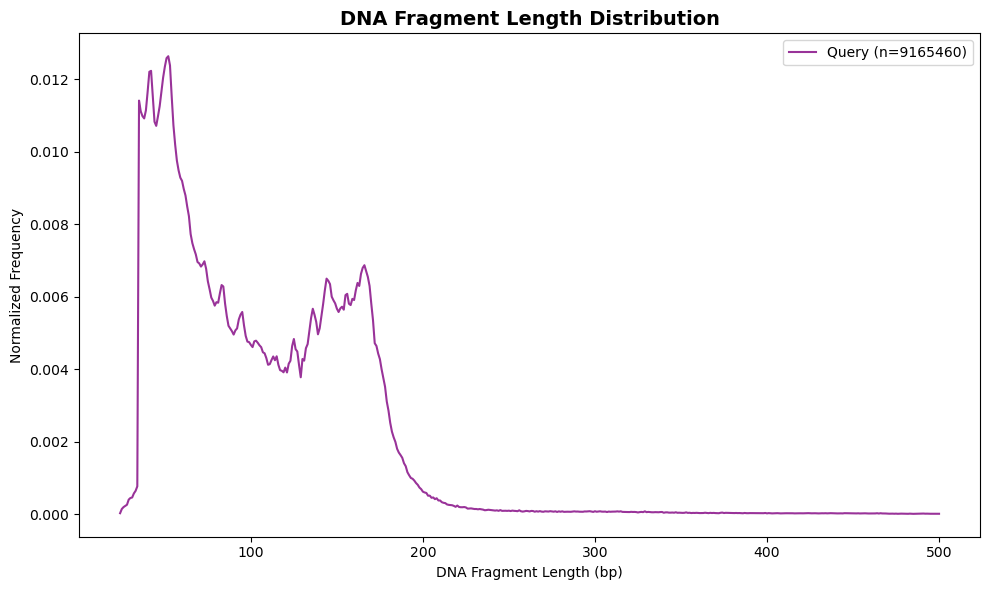

In [3]:
order = np.argsort(SEG_SIZES)
sorted_x = SEG_SIZES[order]
sorted_y = NORMALISED_FREQ[order]

plt.figure(figsize=(10, 6))
plt.plot(sorted_x, sorted_y, linestyle='-', alpha=0.8, color='purple', label=f'Query (n={total})')
plt.legend()
plt.xlabel('DNA Fragment Length (bp)')
plt.ylabel('Normalized Frequency')
plt.title('DNA Fragment Length Distribution', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='', alpha=0.7)
plt.tight_layout()
plt.show()

In [6]:
REF_SIZES = []
REF_FREQ = []

with open('reference.hist', 'r') as ref_file:
    for line in ref_file:
        if line.strip() == '':
            continue

        size, freq = map(float, line.strip().split())

        REF_SIZES.append(int(size))
        REF_FREQ.append(freq)

REF_FREQ = np.array(REF_FREQ)
REF_SIZES = np.array(REF_SIZES)

sample_size = int(0.3 * len(DNA_SEGMENTS))     # Using 30% of our data
counts = (REF_FREQ / REF_FREQ.sum()) * sample_size
counts = counts.astype(int)



In [7]:
FRAG_FREQ = Counter(DNA_SEGMENTS)

RESCALED_SAMPLES = []

for size, target in zip(REF_SIZES, counts):   # Resampling algorithm
    available = FRAG_FREQ.get(size, 0)
    if available == 0:
        continue

    sample_count = min(available, target)
    RESCALED_SAMPLES.extend([size] * sample_count)

    FRAG_FREQ[size] -= sample_count

RESCALED_DIST = Counter(RESCALED_SAMPLES)
rescaled_sizes = np.array(list(RESCALED_DIST.keys()))
rescaled_counts = np.array(list(RESCALED_DIST.values()))

rescaled_freqs = rescaled_counts / rescaled_counts.sum()  # Normalizing

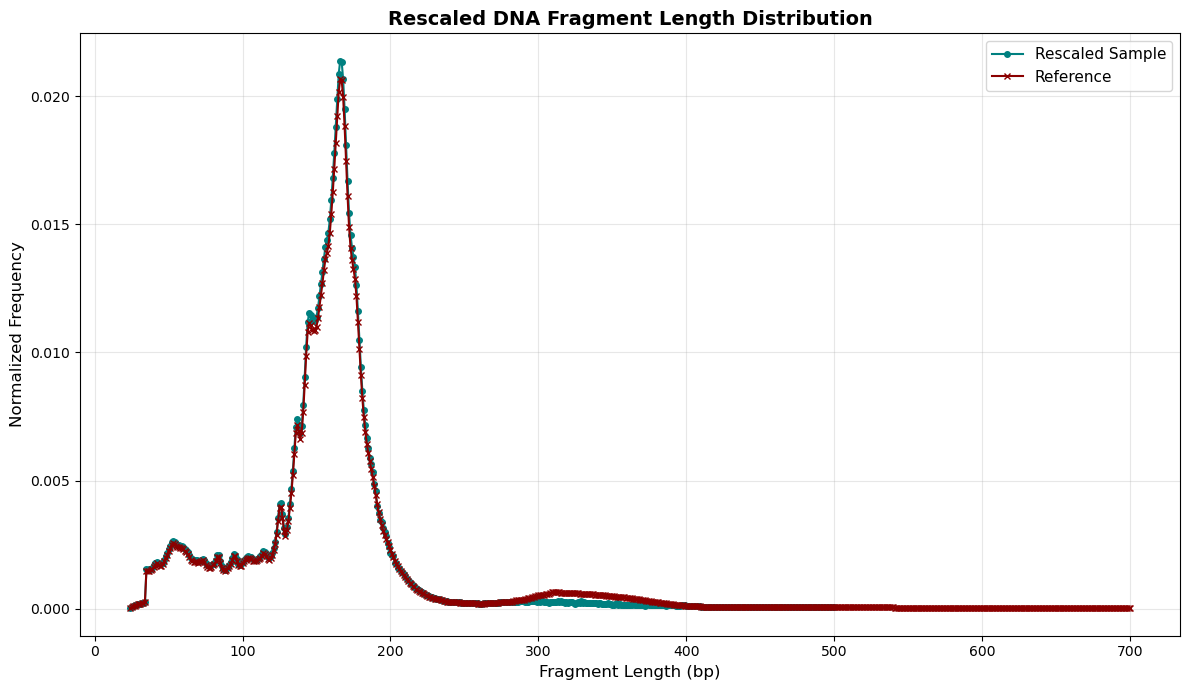

In [8]:
plt.figure(figsize=(12, 7))
plt.plot(rescaled_sizes, rescaled_freqs, 'o-', label='Rescaled Sample', markersize=4, color='teal')
plt.plot(REF_SIZES, REF_FREQ / REF_FREQ.sum(), 'x-', label='Reference', markersize=4, color='darkred')
plt.xlabel('Fragment Length (bp)', fontsize=12)
plt.ylabel('Normalized Frequency', fontsize=12)
plt.title('Rescaled DNA Fragment Length Distribution', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

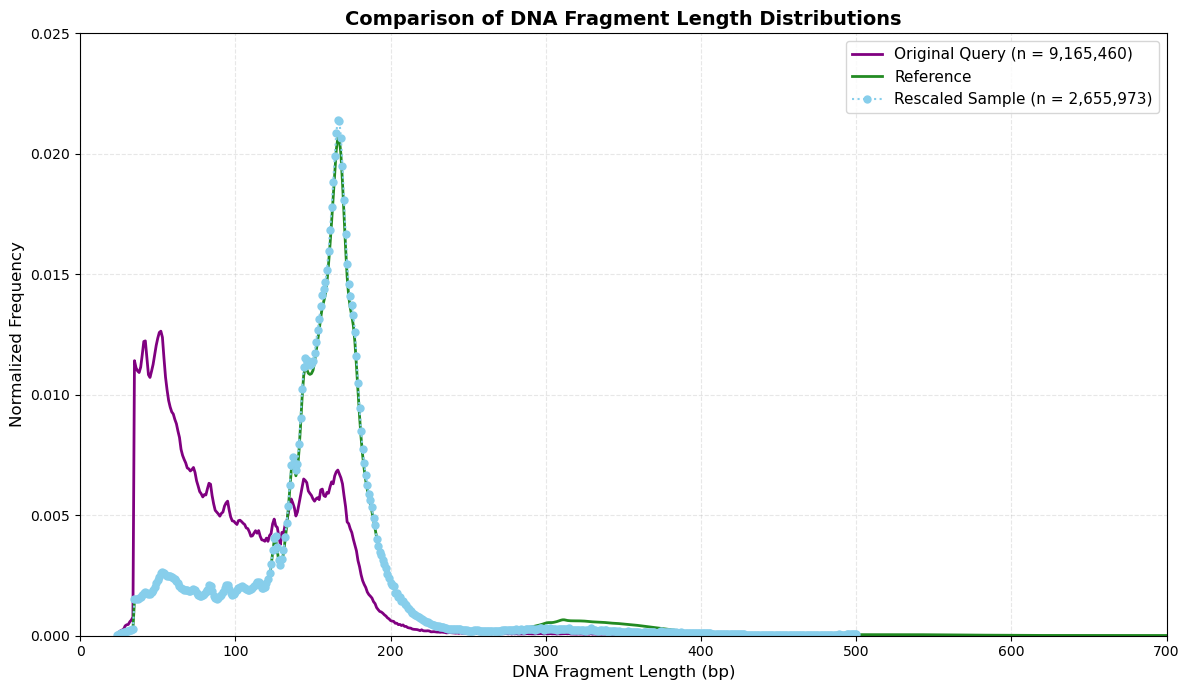

In [9]:
plt.figure(figsize=(12, 7))

query = np.argsort(SEG_SIZES)
plt.plot(SEG_SIZES[query], NORMALISED_FREQ[query], color='purple', linewidth=2, label=f'Original Query (n = {len(DNA_SEGMENTS):,})')

ref = np.argsort(REF_SIZES)
plt.plot(REF_SIZES[ref], REF_FREQ[ref] / REF_FREQ.sum(), color='forestgreen', linewidth=2, label='Reference')

rescaled = np.argsort(rescaled_sizes)
plt.plot(rescaled_sizes[rescaled], rescaled_freqs[rescaled], marker='o', linestyle=':', linewidth=1.5, color='skyblue', markersize=5, label=f'Rescaled Sample (n = {len(RESCALED_SAMPLES):,})')

plt.xlabel('DNA Fragment Length (bp)', fontsize=12)
plt.ylabel('Normalized Frequency', fontsize=12)
plt.title('Comparison of DNA Fragment Length Distributions', fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='upper right')
plt.grid(True, alpha=0.3, linestyle='--')
plt.xlim(0, 700)
plt.ylim(0, 0.025)
plt.tight_layout()
plt.show()